# Proyek Analisis Data: [Air Quality Dataset Changping-Aotizhongxin]


- **Nama:** [Muhammad Faiz Ramadhan]
- **Email:** [m004b4ky2813@bangkit.academy]
- **ID Dicoding:** [aaiizr1]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

- Bagaimana kualitas udara (khususnya tingkat PM2.5 dan PM10) bervariasi pada waktu yang berbeda sepanjang tahun di Changping dan Aotizhongxin?


- Apa korelasi antara kondisi cuaca (misalnya, suhu, kecepatan angin, dan tekanan) dan tingkat polusi di wilayah ini?


## Import Semua Packages/Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Data Wrangling

### Gathering Data

In [2]:
# Read the data
data_aotizhongxin = pd.read_csv('data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data_changping = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')

# Check the first few rows of the datasets to understand their structure
data_aotizhongxin.head(), data_changping.head()

(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  ,
    No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
 1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.

**Insight:**
- Data ini berisi informasi rinci tentang kualitas udara di dua lokasi di Beijing (Aotizhongxin dan Changping) selama lima tahun (2013-2017).
- Data meliputi berbagai jenis polutan, kondisi cuaca, dan informasi waktu yang dikumpulkan setiap jam.

### Assessing Data

In [3]:
# Combine the two datasets
combined_data = pd.concat([data_aotizhongxin, data_changping], ignore_index=True)

# Assess missing values
missing_values = combined_data.isnull().sum()

# Summary statistics to identify any anomalies in the data
summary_stats = combined_data.describe()

missing_values, summary_stats

(No            0
 year          0
 month         0
 day           0
 hour          0
 PM2.5      1699
 PM10       1300
 SO2        1563
 NO2        1690
 CO         3297
 O3         2323
 TEMP         73
 PRES         70
 DEWP         73
 RAIN         71
 wd          221
 WSPM         57
 station       0
 dtype: int64,
                  No          year         month           day          hour  \
 count  70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
 mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
 std    10122.177085      1.177205      3.448728      8.800155      6.922236   
 min        1.000000   2013.000000      1.000000      1.000000      0.000000   
 25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
 50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
 75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
 max    35064.000000   2017.000000     

**Insight:**
- Dataset  memiliki missing value dalam beberapa kolom utama.
- Kolom dengan missing value terbanyak adalah CO (3297), diikuti oleh PM2.5 (1699).
- Kolom lainnya seperti TEMP, PRES, DEWP, RAIN, dan WSPM memiliki sedikit missing value, dibawah 100.

### Cleaning Data

In [4]:
# Filling missing values with column means for continuous variables
continuous_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
combined_data[continuous_columns] = combined_data[continuous_columns].fillna(combined_data[continuous_columns].mean())

# For wind direction (wd), we can fill missing values with the mode (most common wind direction)
combined_data['wd'] = combined_data['wd'].fillna(combined_data['wd'].mode()[0])

# Verify that no missing values remain
missing_values_after_cleaning = combined_data.isnull().sum()

missing_values_after_cleaning


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Nilai hilang diisi dengan rata-rata untuk variabel kontinu.
- Nilai hilang untuk arah angin diisi dengan modus.

### Save Data to CSV

In [11]:
combined_data.to_csv('dashboard/combined_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore

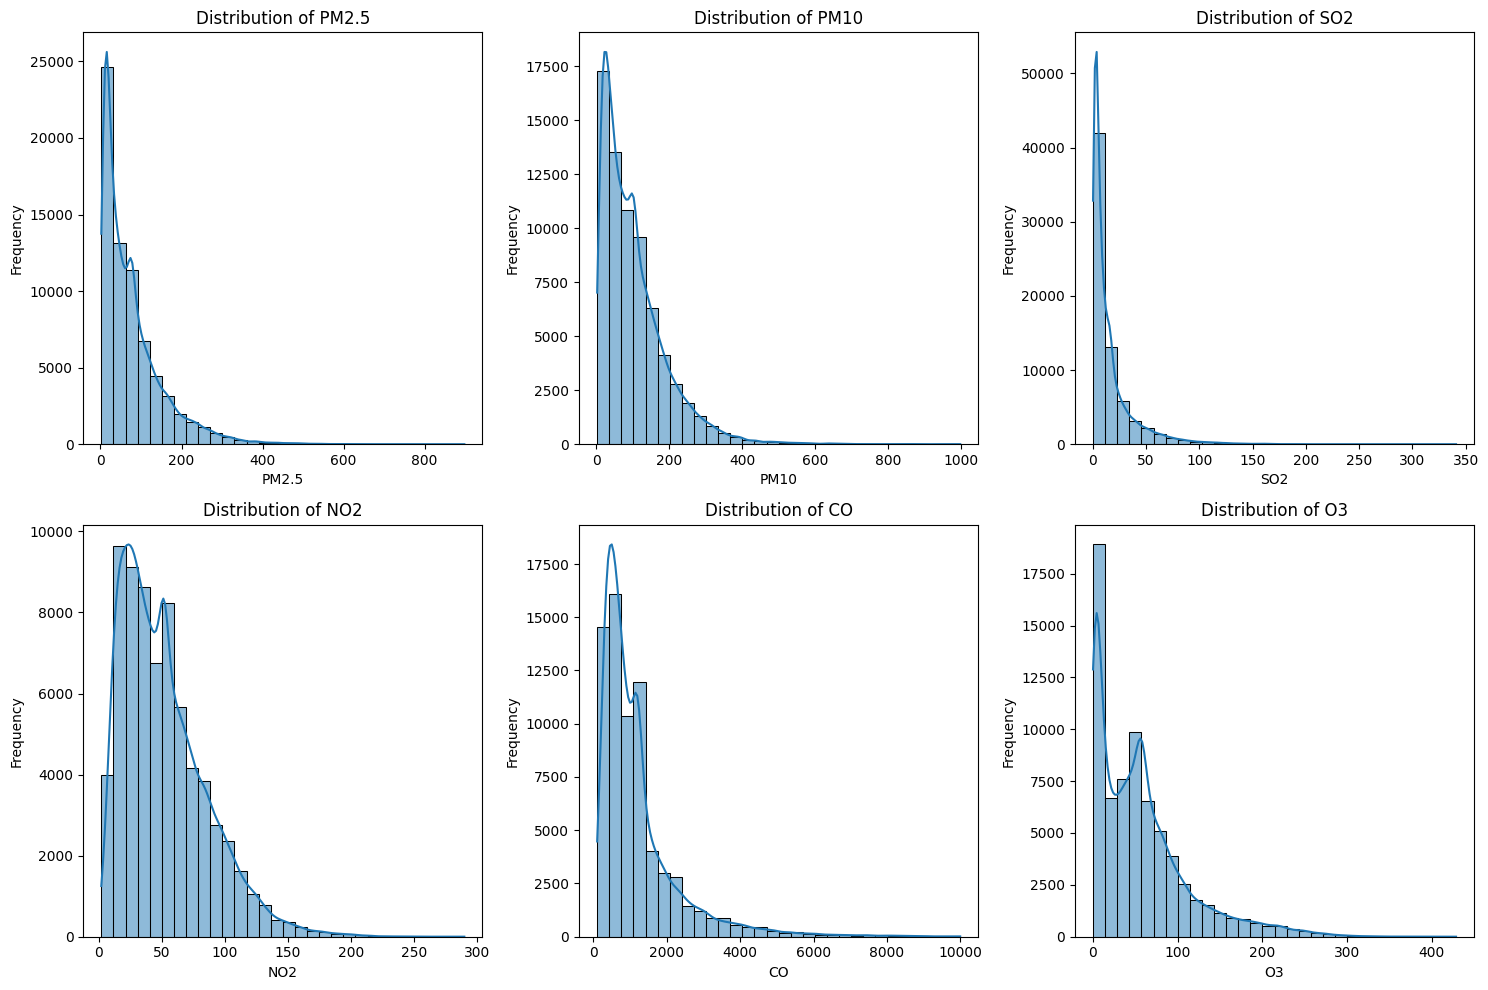

In [5]:
# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Plot distributions of key pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(combined_data[pollutant], bins=30, kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insight:**
- Distribusi konsentrasi polutan bervariasi: Setiap jenis polutan (PM2.5, PM10, SO2, NO2, CO, dan O3) memiliki pola distribusi yang berbeda-beda.
- Adanya masalah kualitas udara karena polutan menunjukkan konsentrasi yang tinggi atau distribusi yang tidak normal

## Visualization & Explanatory Analysis

### Pertanyaan 1:

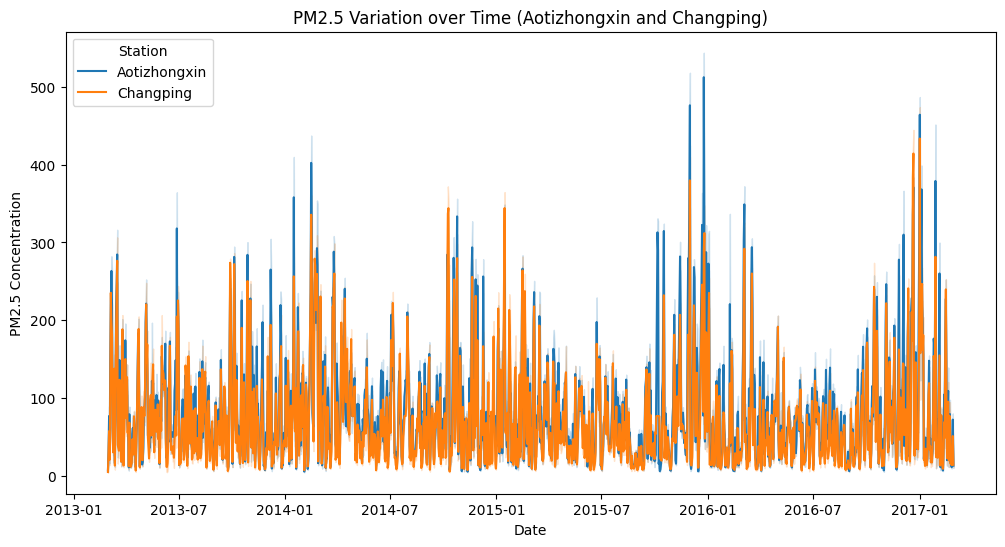

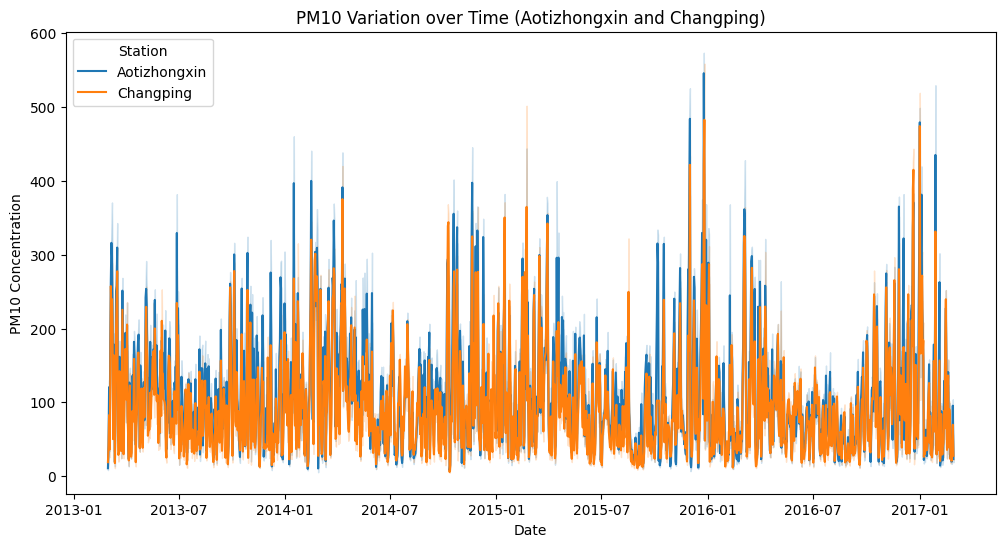

In [6]:
# Convert year, month, and day to a datetime column
combined_data['date'] = pd.to_datetime(combined_data[['year', 'month', 'day']])

# Filter for Aotizhongxin and Changping stations
stations = ['Aotizhongxin', 'Changping']
filtered_data = combined_data[combined_data['station'].isin(stations)]

# Plot PM2.5 and PM10 variation over time
plt.figure(figsize=(12, 6))

# Plot PM2.5
sns.lineplot(data=filtered_data, x='date', y='PM2.5', hue='station')
plt.title('PM2.5 Variation over Time (Aotizhongxin and Changping)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend(title='Station')

# Plot PM10 in a new figure
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='date', y='PM10', hue='station')
plt.title('PM10 Variation over Time (Aotizhongxin and Changping)')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration')
plt.legend(title='Station')

plt.show()


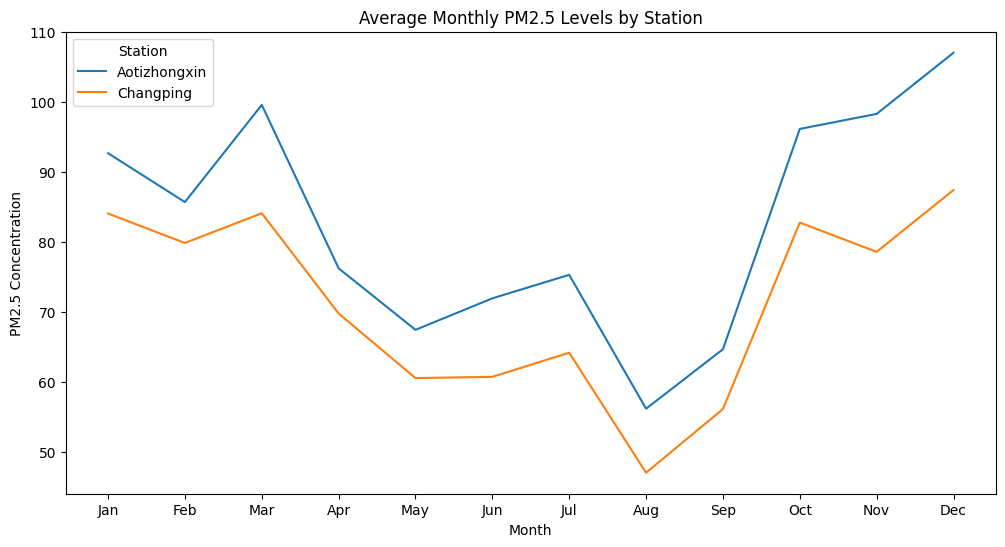

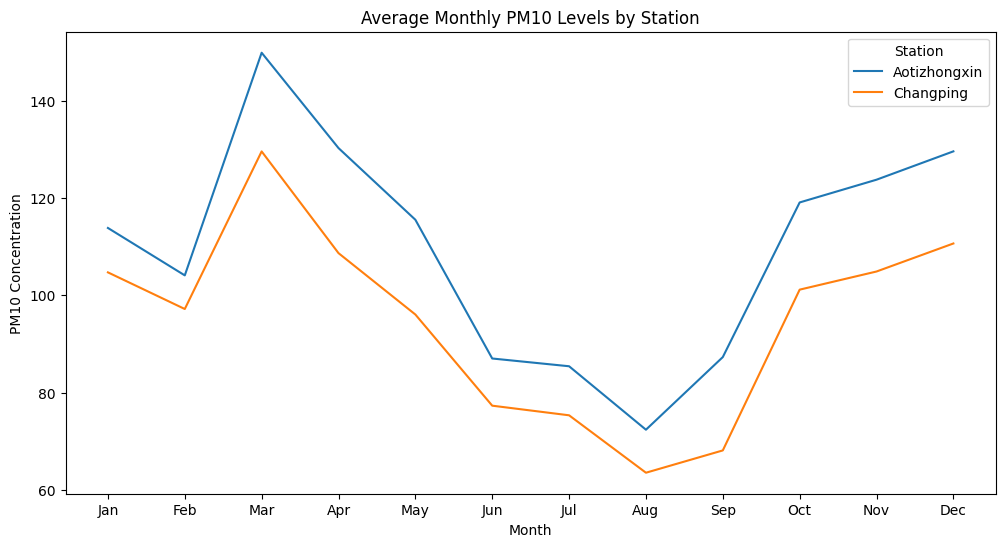

In [7]:
# Ensure 'date' is in datetime format
combined_data['date'] = pd.to_datetime(combined_data[['year', 'month', 'day', 'hour']])
combined_data['month'] = combined_data['date'].dt.month
monthly_pollution_station = combined_data.groupby(['station', 'month'])[['PM2.5', 'PM10']].mean().reset_index()

# Plotting the average monthly PM2.5 by station
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pollution_station, x='month', y='PM2.5', hue='station')
plt.title('Average Monthly PM2.5 Levels by Station')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Station')
plt.show()

# Plotting the average monthly PM10 by station
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pollution_station, x='month', y='PM10', hue='station')
plt.title('Average Monthly PM10 Levels by Station')
plt.xlabel('Month')
plt.ylabel('PM10 Concentration')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Station')
plt.show()


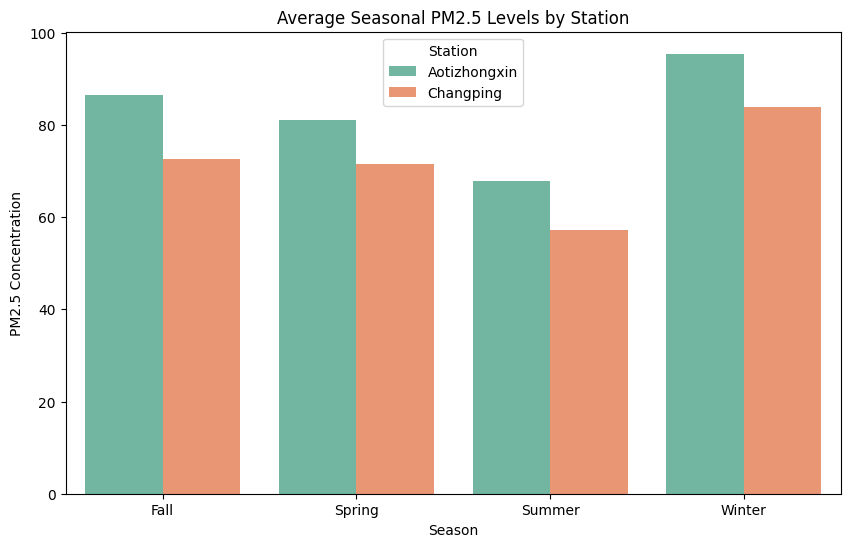

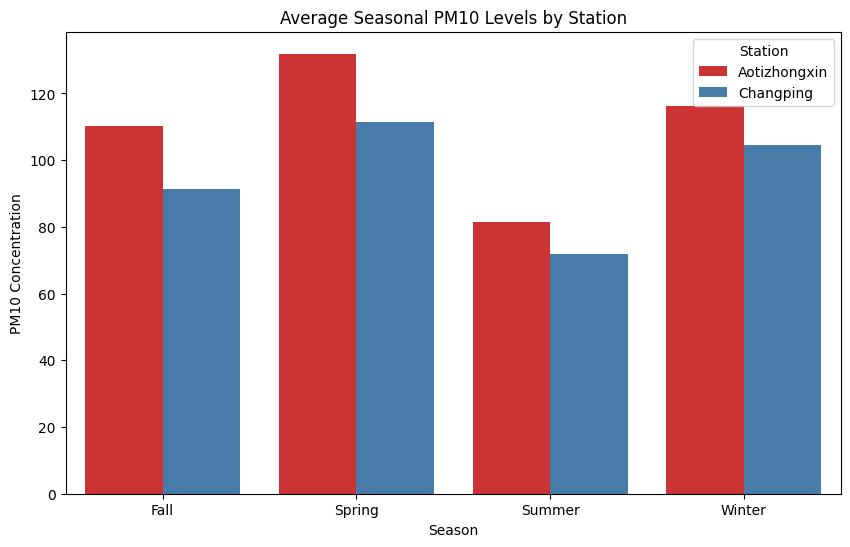

In [ ]:
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Add a 'season' column
combined_data['season'] = combined_data['month'].apply(get_season)

# Group by station and season, and calculate the average PM2.5 and PM10 levels
seasonal_pollution_station = combined_data.groupby(['station', 'season'])[['PM2.5', 'PM10']].mean().reset_index()

# Plotting the average seasonal PM2.5 by station
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM2.5', hue='station', data=seasonal_pollution_station, palette='Set2')
plt.title('Average Seasonal PM2.5 Levels by Station')
plt.xlabel('Season')
plt.ylabel('PM2.5 Concentration')
plt.legend(title='Station')
plt.show()

# Plotting the average seasonal PM10 by station
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='PM10', hue='station', data=seasonal_pollution_station, palette='Set1')
plt.title('Average Seasonal PM10 Levels by Station')
plt.xlabel('Season')
plt.ylabel('PM10 Concentration')
plt.legend(title='Station')
plt.show()

**Insight**
- Kedua stasiun menunjukkan pola musiman yang berbeda dalam tingkat polusi baik PM2.5 maupun PM10. Stasiun Aotizhongxin umumnya mengalami puncak polusi pada awal tahun (Maret) dan akhir tahun (November), sedangkan stasiun Changping cenderung mengalami puncak polusi pada pertengahan tahun (Oktober).
- Secara keseluruhan, kualitas udara di stasiun Aotizhongxin lebih buruk dibandingkan dengan stasiun Changping, ditunjukkan oleh tingkat PM2.5 dan PM10 yang lebih tinggi.

### Pertanyaan 2:

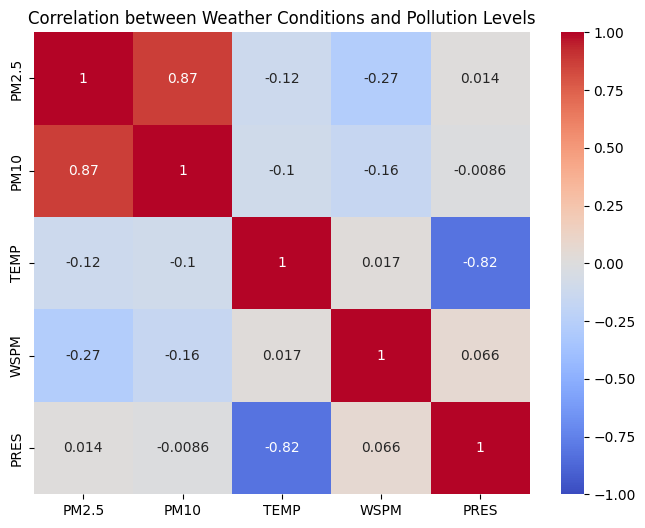

In [9]:
# Select relevant columns
corr_columns = ['PM2.5', 'PM10', 'TEMP', 'WSPM', 'PRES']
corr_matrix = combined_data[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Weather Conditions and Pollution Levels')
plt.show()


**Insight**
- Menunjukkan hubungan yang sangat kuat antara konsentrasi PM2.5 dan PM10. Artinya, ketika tingkat PM2.5 meningkat, maka tingkat PM10 juga cenderung meningkat, dan sebaliknya. Hal ini menunjukkan bahwa kedua polutan ini seringkali berasal dari sumber yang sama atau dipengaruhi oleh faktor yang sama.
- ketika suhu meningkat, tekanan udara cenderung menurun,

## Conclusion

Analisis data kualitas udara di stasiun Aotizhongxin dan Changping menunjukkan adanya perbedaan pola musiman yang signifikan antara kedua lokasi. Stasiun Aotizhongxin umumnya mengalami puncak polusi pada awal dan akhir tahun, sementara Changping pada pertengahan tahun. Secara keseluruhan, kualitas udara di Aotizhongxin lebih buruk dibandingkan Changping. Selain itu, terdapat korelasi yang sangat kuat antara konsentrasi PM2.5 dan PM10, mengindikasikan adanya sumber polusi yang sama atau faktor yang sama yang memengaruhi keduanya. Korelasi negatif antara suhu dan tekanan udara juga ditemukan, yang merupakan fenomena meteorologi umum. Variasi dalam distribusi konsentrasi berbagai polutan menunjukkan adanya masalah kualitas udara yang perlu diperhatikan, terutama di daerah dengan konsentrasi polutan tinggi atau pola distribusi yang tidak normal.